In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
game_data = pd.read_csv("../Data/Processed_Data/game_data.csv")

In [3]:
game_stats = game_data[game_data.columns[2:27]]

<Axes: >

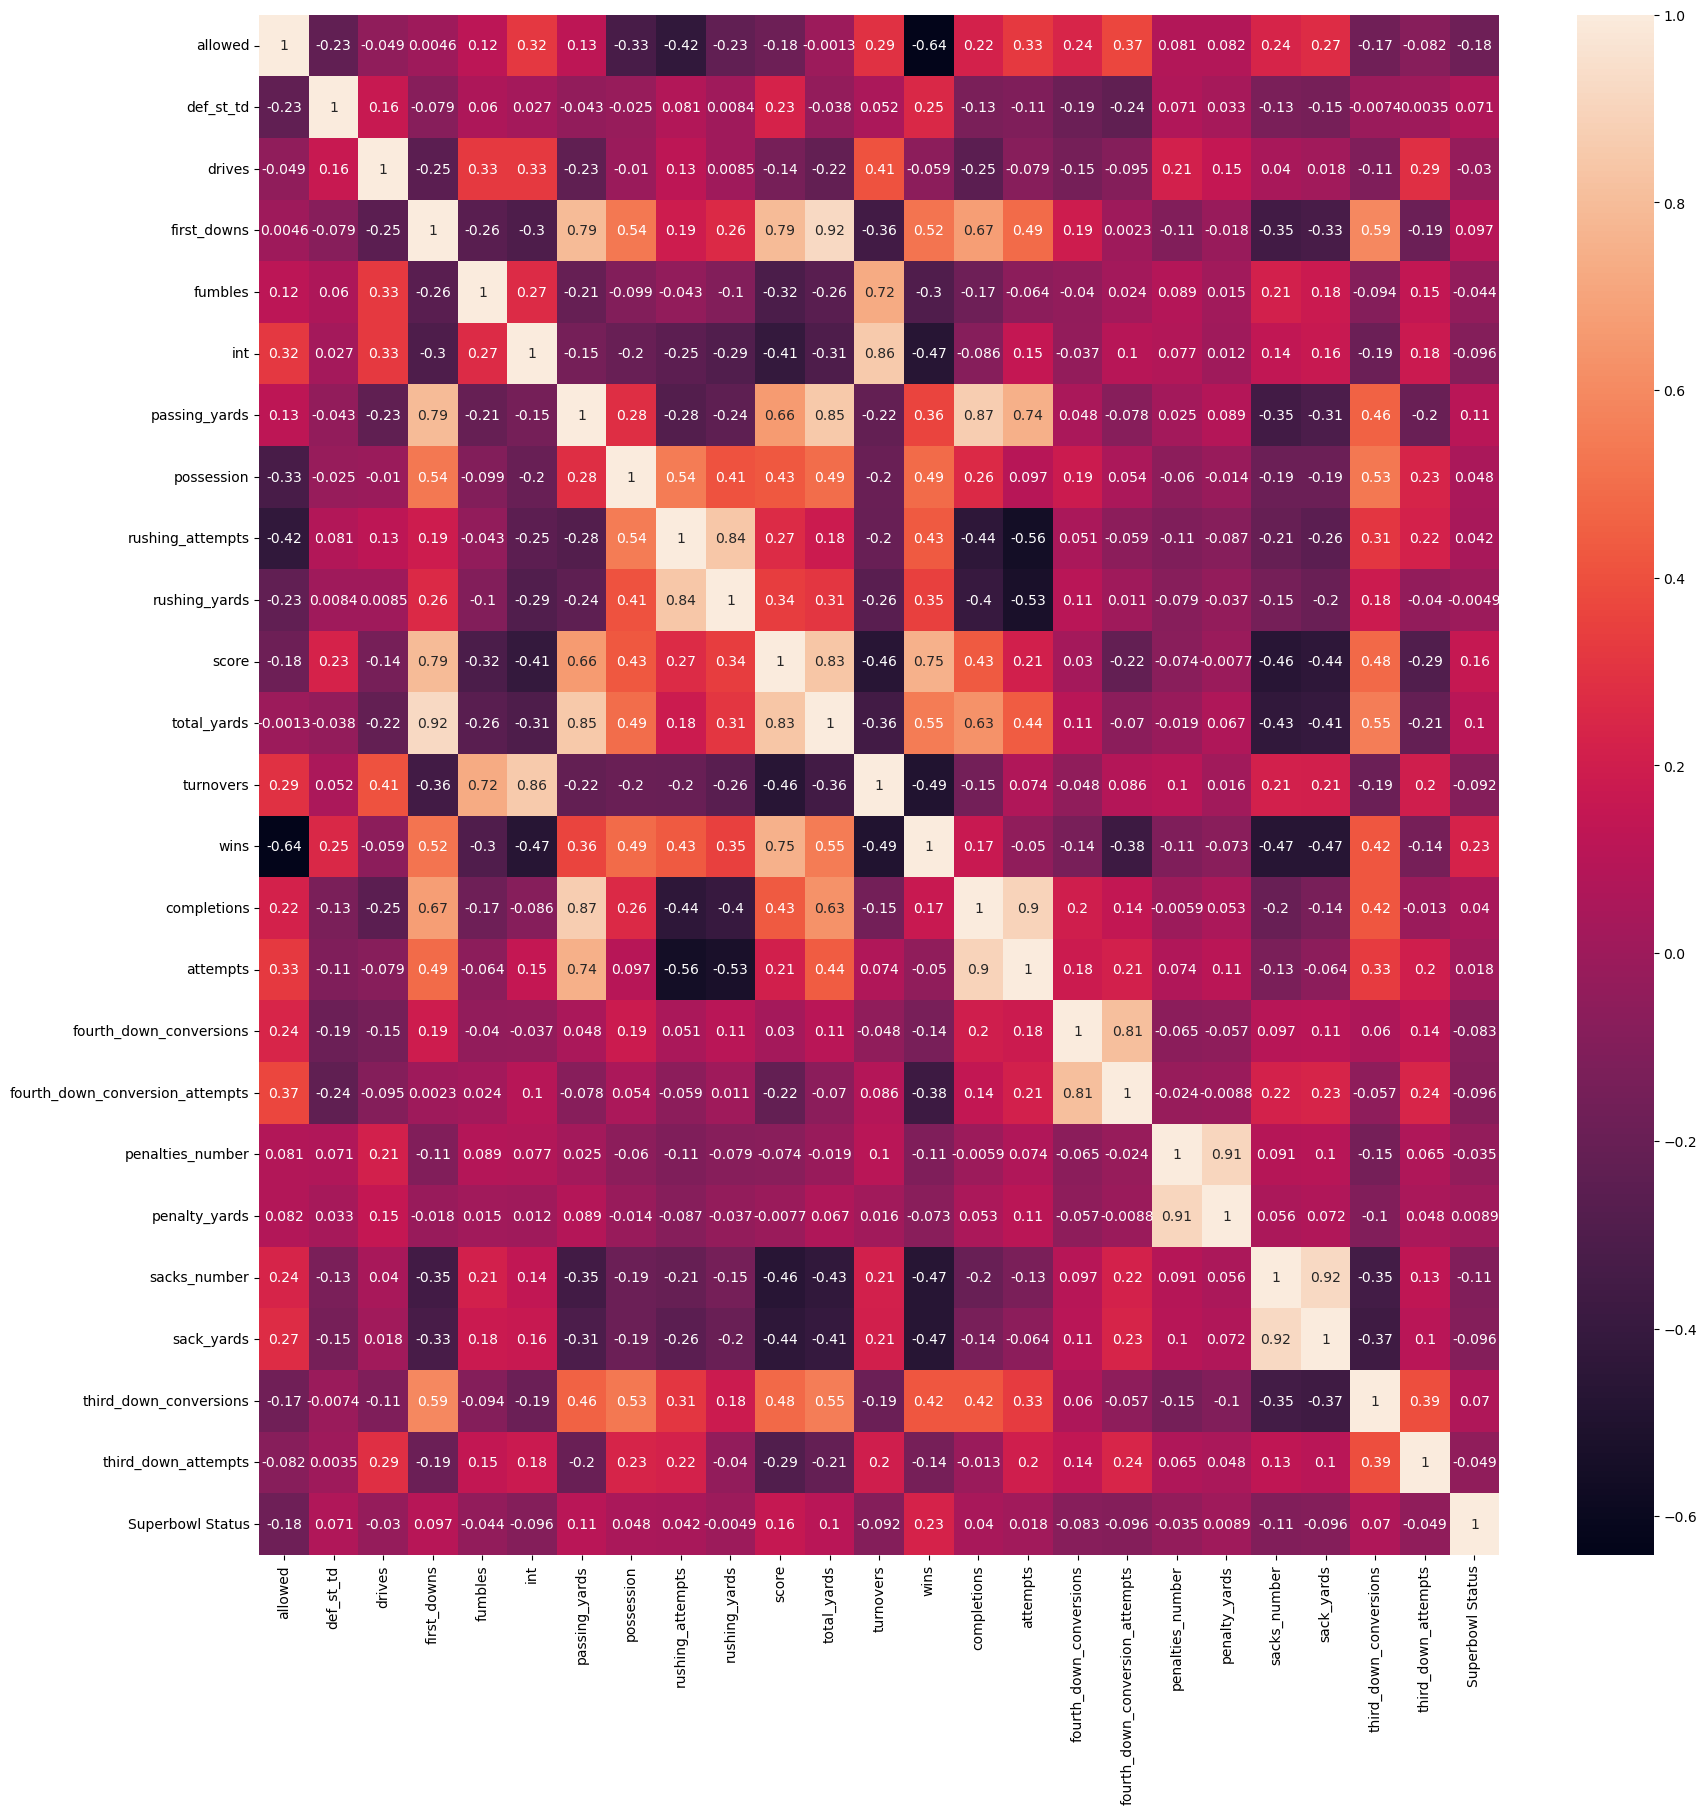

In [4]:
fig, ax = plt.subplots(figsize = (20,20))

corr_mat = game_stats.corr()
corr_mat
sns.heatmap(corr_mat, annot = True)

In [5]:
game_stats.drop(["fourth_down_conversion_attempts", "first_downs", "turnovers", "completions", "total_yards", "rushing_attempts",
                "penalties_number", "sacks_number", "score", "attempts"], axis = 1, inplace = True)
dropped = ["fourth_down_conversion_attempts", "first_downs", "turnovers", "completions", "total_yards", "rushing_attempts",
                "penalties_number", "sacks_number", "score", "attempts"]

/tmp/ipykernel_2202947/2714459550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_stats.drop(["fourth_down_conversion_attempts", "first_downs", "turnovers", "completions", "total_yards", "rushing_attempts",


<Axes: >

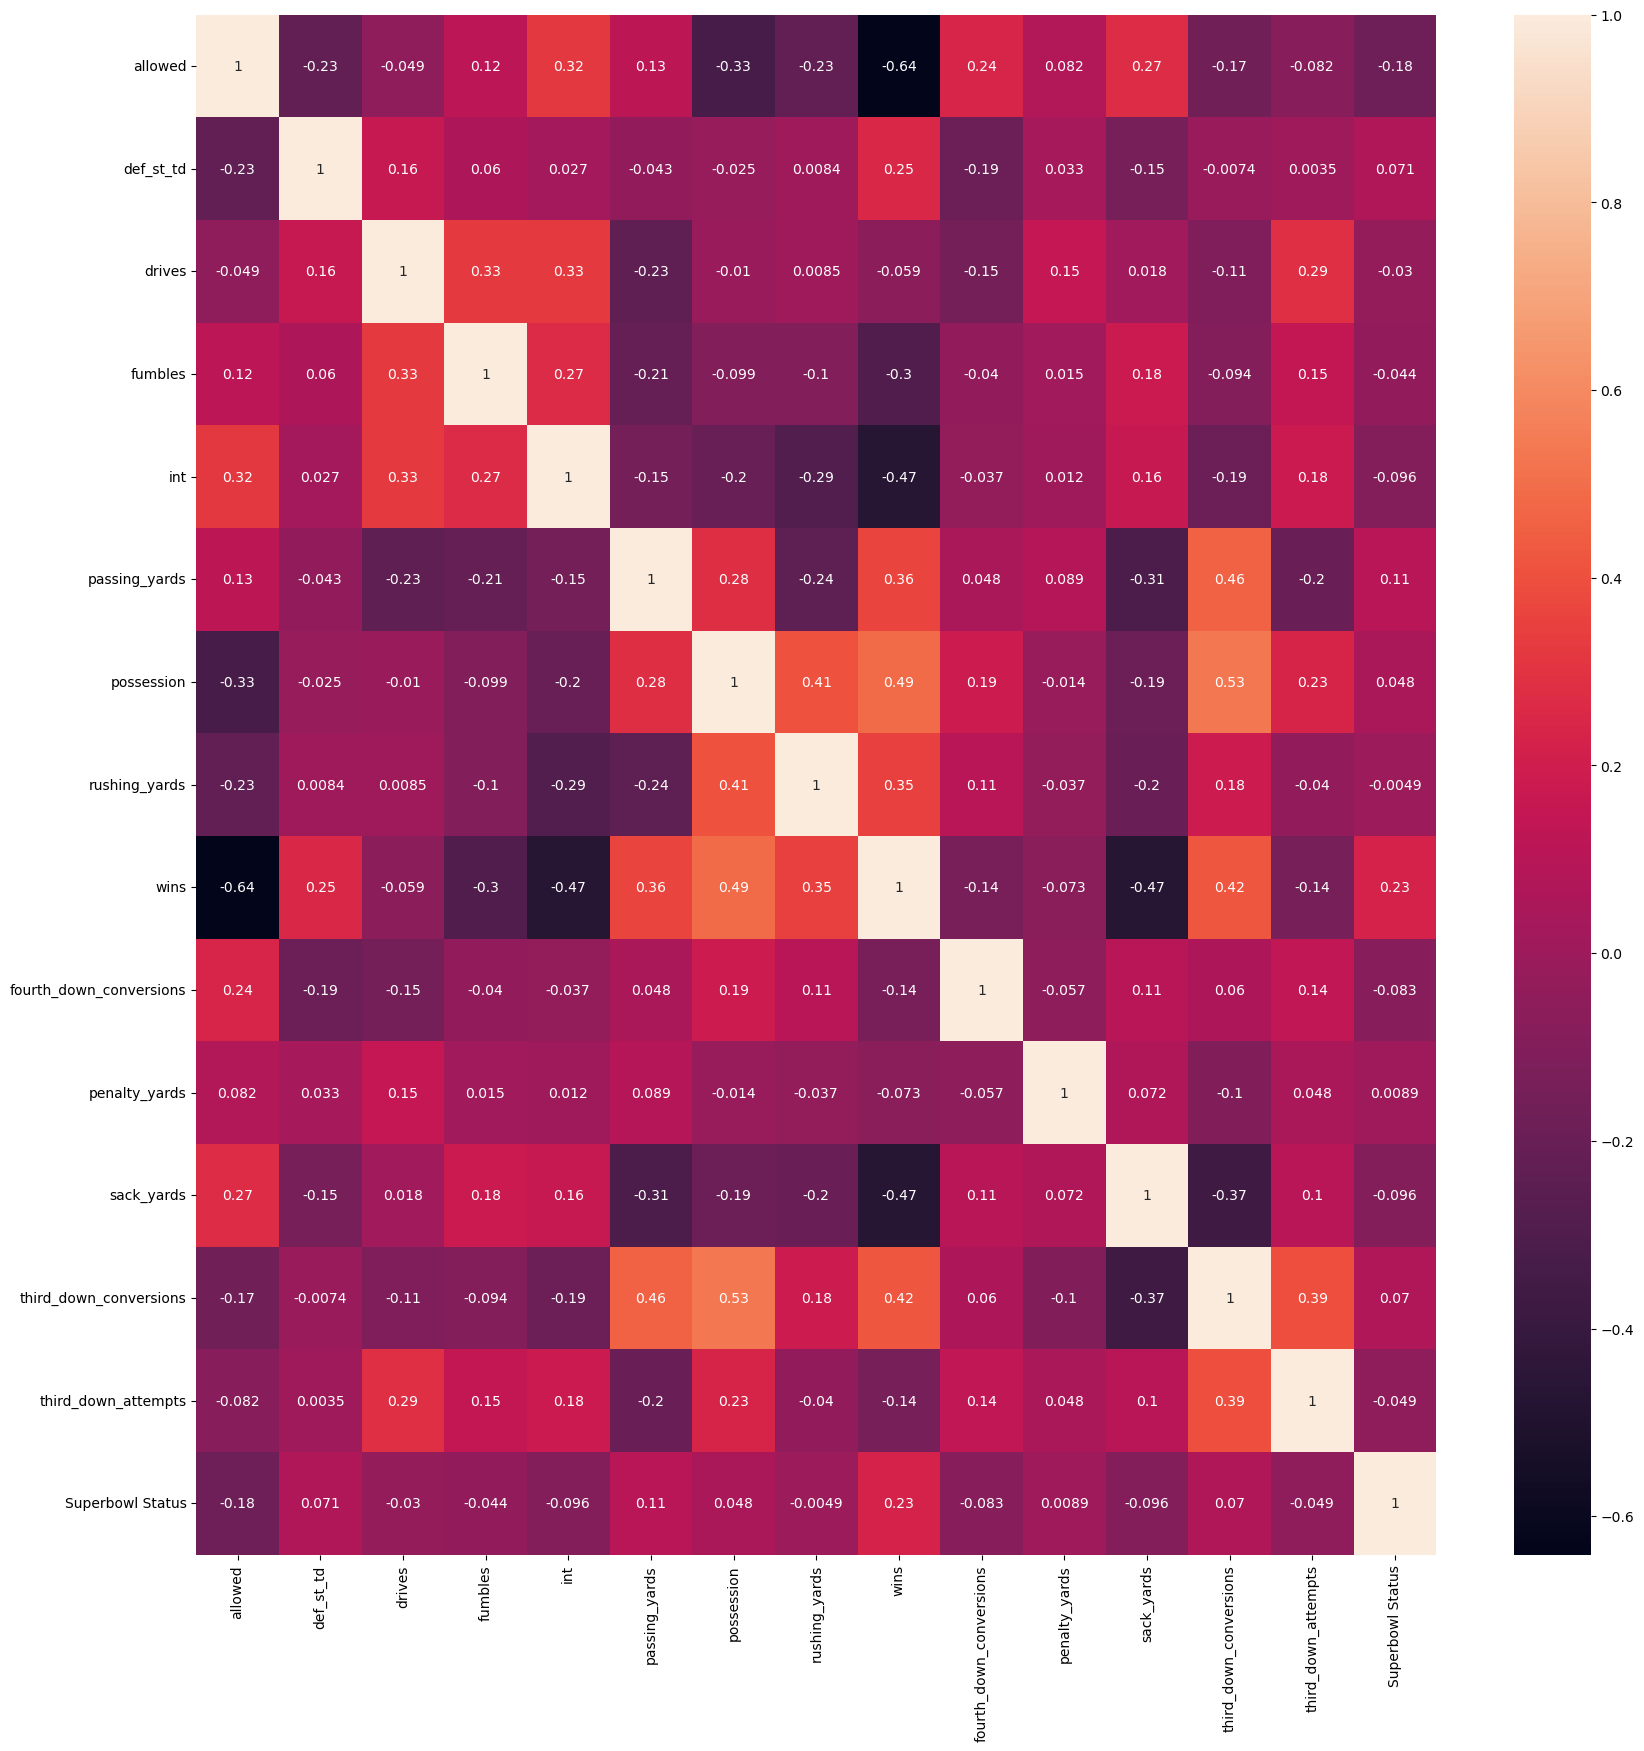

In [6]:
fig, ax = plt.subplots(figsize = (20,20))

corr_mat = game_stats.corr()
corr_mat
sns.heatmap(corr_mat, annot = True)

In [7]:
game_stats
atts = game_stats.columns

In [9]:
game_stats
wins = game_stats[game_stats["Superbowl Status"] == 1]
len(wins)/len(game_stats)

0.03125

In [10]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 69)

for train_index, test_index in split.split(game_stats, game_stats["Superbowl Status"]):
    game_train = game_stats.loc[train_index]
    game_test = game_stats.loc[test_index]

    


sb_train = game_train["Superbowl Status"]
sb_test = game_test["Superbowl Status"]

game_train = game_train.drop(["Superbowl Status"], axis = 1)
game_test = game_test.drop(["Superbowl Status"], axis = 1)

game_train

,allowed,def_st_td,drives,fumbles,int,passing_yards,possession,rushing_yards,wins,fourth_down_conversions,penalty_yards,sack_yards,third_down_conversions,third_down_attempts
485,410,2,187,13,28,3228,451.133333,1714,0,12,924,309,73,216
327,357,7,209,13,21,3005,469.183333,1204,5,10,857,378,58,230
289,341,16,204,9,20,3011,486.750000,2015,8,2,800,335,66,203
436,323,5,192,9,8,3503,482.250000,1850,10,11,906,322,70,208
477,328,3,188,8,16,3176,504.950000,1859,9,9,868,242,87,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,308,9,198,9,10,3589,512.833333,2282,15,6,887,284,86,203
329,425,1,189,17,20,2713,485.250000,2395,2,7,733,224,70,212
244,297,8,195,8,8,4180,528.733333,1885,11,3,1057,312,103,219
666,345,1,186,11,14,3692,501.816667,1982,7,4,841,277,88,219


In [11]:
smote = SMOTE(random_state = 69)
game_train, sb_train = smote.fit_resample(game_train, sb_train)

In [12]:
logit_model = sm.Logit(sb_train, sm.add_constant(game_train))
result = logit_model.fit(maxiter = 2000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.369087
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       Superbowl Status   No. Observations:                 1040
Model:                          Logit   Df Residuals:                     1025
Method:                           MLE   Df Model:                           14
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.4675
Time:                        22:12:42   Log-Likelihood:                -383.85
converged:                       True   LL-Null:                       -720.87
Covariance Type:            nonrobust   LLR p-value:                8.899e-135
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.4157      3.532      0.967      0.333      -3.506   

In [13]:
game_train.drop(["def_st_td", "fumbles", "rushing_yards", "fourth_down_conversions", "penalty_yards"
                ,"sack_yards"], axis = 1, inplace = True)
game_test.drop(["def_st_td", "fumbles", "rushing_yards", "fourth_down_conversions", "penalty_yards"
                ,"sack_yards"], axis = 1, inplace = True)
drop = ["def_st_td", "fumbles", "rushing_yards", "fourth_down_conversions", "penalty_yards"
                ,"sack_yards"]
for cat in drop:
    dropped.append(cat)
logit_model = sm.Logit(sb_train, sm.add_constant(game_train))
result = logit_model.fit(maxiter = 2000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.370042
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       Superbowl Status   No. Observations:                 1040
Model:                          Logit   Df Residuals:                     1031
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.4661
Time:                        22:12:51   Log-Likelihood:                -384.84
converged:                       True   LL-Null:                       -720.87
Covariance Type:            nonrobust   LLR p-value:                7.396e-140
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.1739      3.116      1.661      0.097      -0.932      

In [14]:
preds = result.predict(sm.add_constant(game_test))
preds = round(preds)

In [15]:
preds = result.predict(sm.add_constant(game_test))
preds = round(preds)

In [17]:
mat = confusion_matrix(sb_test, preds)
mat

array([[97, 34],
       [ 1,  3]])

In [16]:

print(classification_report(sb_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       131
           1       0.08      0.75      0.15         4

    accuracy                           0.74       135
   macro avg       0.54      0.75      0.50       135
weighted avg       0.96      0.74      0.83       135



In [18]:
nfl_2022 = game_data[game_data["date"] == 2022]
nfl_2022_stats = nfl_2022.drop(["date", "team"], axis = 1)
nfl_2022_stats = nfl_2022_stats.drop(dropped, axis = 1)
nfl_2022_stats = nfl_2022_stats.drop("Superbowl Status", axis = 1)
nfl_2022_stats

,allowed,drives,int,passing_yards,possession,wins,third_down_conversions,third_down_attempts
640,277,186,9,3856,542.300000,13,95,211
641,463,181,15,2219,501.716667,3,90,220
642,322,178,12,4240,516.083333,12,95,206
643,286,173,14,4129,477.716667,13,97,193
644,359,200,15,3592,509.216667,5,67,230
645,381,180,12,3444,540.950000,7,88,231
646,358,195,10,4586,504.116667,8,92,246
647,449,187,17,3626,514.000000,4,82,233
648,384,190,10,4584,522.000000,10,112,257
649,369,180,12,5062,515.150000,14,94,193


In [19]:
pred2022 = result.predict(sm.add_constant(nfl_2022_stats))
pred2022

640    0.750145
641    0.000019
642    0.708342
643    0.940704
644    0.027949
645    0.008261
646    0.222352
647    0.001162
648    0.157452
649    0.925886
650    0.001877
651    0.039037
652    0.536204
653    0.392839
654    0.769697
655    0.002227
656    0.032387
657    0.123870
658    0.197281
659    0.049647
660    0.023501
661    0.033114
662    0.145510
663    0.008165
664    0.002297
665    0.109896
666    0.043289
667    0.126079
668    0.029718
669    0.002121
670    0.011835
671    0.653150
dtype: float64

In [20]:
nfl_2022["winner%"] = pred2022
nfl_2022

/tmp/ipykernel_2202947/2277505608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_2022["winner%"] = pred2022


,date,team,allowed,def_st_td,drives,first_downs,fumbles,int,passing_yards,possession,...,fourth_down_conversions,fourth_down_conversion_attempts,penalties_number,penalty_yards,sacks_number,sack_yards,third_down_conversions,third_down_attempts,Superbowl Status,winner%
640,2022,49ers,277,3,186,347,8,9,3856,542.300000,...,7,17,94,730,31,193,95,211,0,0.750145
641,2022,Bears,463,0,181,278,10,15,2219,501.716667,...,8,25,80,754,58,379,90,220,0,0.000019
642,2022,Bengals,322,1,178,357,6,12,4240,516.083333,...,3,12,81,623,44,280,95,206,0,0.708342
643,2022,Bills,286,3,173,367,13,14,4129,477.716667,...,7,13,92,709,33,162,97,193,0,0.940704
644,2022,Broncos,359,0,200,300,9,15,3592,509.216667,...,12,24,113,970,63,415,67,230,0,0.027949
645,2022,Browns,381,4,180,350,9,12,3444,540.950000,...,23,42,102,865,44,266,88,231,0,0.008261
646,2022,Buccaneers,358,1,195,346,12,10,4586,504.116667,...,15,27,99,793,22,160,92,246,0,0.222352
647,2022,Cardinals,449,5,187,326,8,17,3626,514.000000,...,18,41,118,916,46,340,82,233,0,0.001162
648,2022,Chargers,384,1,190,352,9,10,4584,522.000000,...,15,29,81,635,39,207,112,257,0,0.157452
649,2022,Chiefs,369,2,180,408,11,12,5062,515.150000,...,9,12,87,838,26,188,94,193,1,0.925886


In [21]:
nfl_2022 = nfl_2022.sort_values("winner%", ascending = False)
nfl_2022 = nfl_2022.drop(dropped, axis  = 1)
